In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("movies.csv")

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# check for missing data
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
# check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
mode_values = df[['votes', 'budget', 'gross', 'runtime', 'rating']].mode().iloc[0]
df[['votes', 'budget', 'gross', 'runtime', 'rating']] = df[['votes', 'budget', 'gross', 'runtime', 'rating']].fillna(mode_values)

df.isnull().sum()

name         0
rating       0
genre        0
year         0
released     2
score        3
votes        0
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      0
dtype: int64

In [7]:
df[['votes', 'budget', 'gross', 'runtime']] = df[['votes', 'budget', 'gross', 'runtime']].astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7668 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7668 non-null   int32  
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    7668 non-null   int32  
 12  gross     7668 non-null   int32  
 13  company   7651 non-null   object 
 14  runtime   7668 non-null   int32  
dtypes: float64(1), int32(4), int64(1), object(9)
memory usage: 778.9+ KB


In [9]:
# drop year column as we already have release date column
df.drop('year',axis=1,inplace=True)

In [10]:
# sort descending to check the highest gross movies
df.sort_values(by='gross',ascending=False)[:5]

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
7480,The Lion King,PG,Animation,"July 19, 2019 (United States)",6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118
6653,Jurassic World,PG-13,Action,"June 12, 2015 (United States)",7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124
6043,The Avengers,PG-13,Action,"May 4, 2012 (United States)",8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143


In [11]:
# to view 100 rows 
pd.set_option('display.max_rows',100)

In [12]:
# check for duplicates
df.duplicated().sum()

0

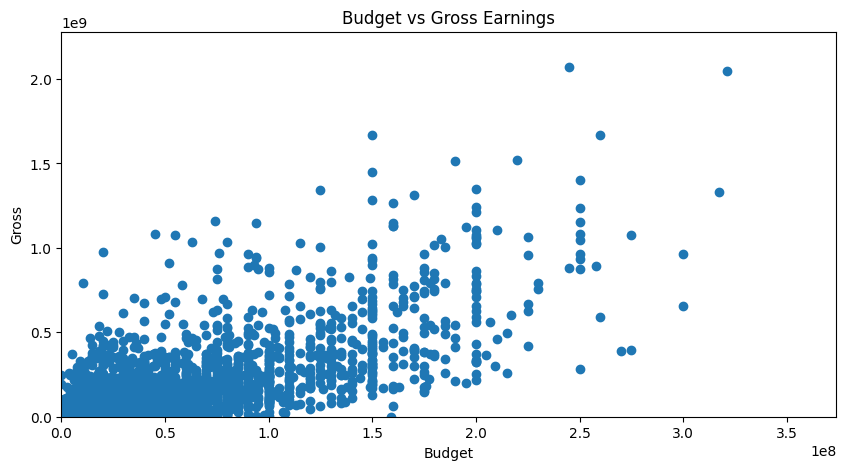

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(data=df, x='budget', y='gross')
plt.xlim(left=0)  # Set x-axis lower limit to 0
plt.ylim(bottom=0)  # Set y-axis lower limit to 0
plt.title("Budget vs Gross Earnings")
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

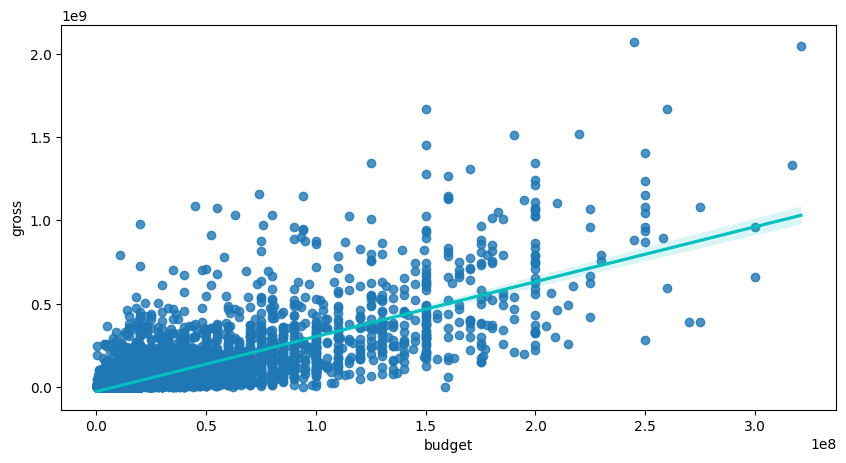

In [14]:
plt.figure(figsize=(10,5))
filter_gross=df[df['gross']>=0]
sns.regplot(data=filter_gross,x='budget',y='gross',line_kws={'color':'c'})

In [15]:
# look at correlation
numeric_df=df.select_dtypes(include='number')
numeric_df.corr()

,score,votes,budget,gross,runtime
score,1.000000,0.409182,0.061857,0.168829,0.399581
votes,0.409182,1.000000,0.462013,0.573369,0.309150
budget,0.061857,0.462013,1.000000,0.679736,0.273507
gross,0.168829,0.573369,0.679736,1.000000,0.203609
runtime,0.399581,0.309150,0.273507,0.203609,1.000000


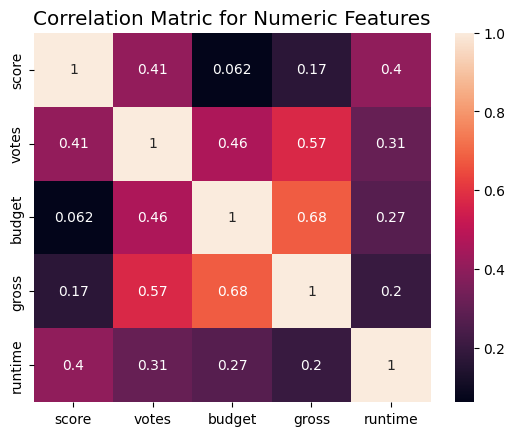

In [16]:
corr=numeric_df.corr()
sns.heatmap(corr,annot=True)
plt.style.use('ggplot')
plt.title('Correlation Matric for Numeric Features')
plt.show()

In [119]:
df['company'].unique()

array(['Warner Bros.', 'Columbia Pictures', 'Lucasfilm', ...,
       'Dow Jazz Films', 'Embi Productions', 'PK 65 Films'], dtype=object)

In [117]:
df['company'].value_counts()

company
Universal Pictures          377
Warner Bros.                334
Columbia Pictures           332
Paramount Pictures          320
Twentieth Century Fox       240
                           ... 
Digital Image Associates      1
Kopelson Entertainment        1
Clavius Base                  1
Tim Burton Productions        1
PK 65 Films                   1
Name: count, Length: 2385, dtype: int64